<a href="https://colab.research.google.com/github/sumi1git/myproject/blob/main/mvsa_cross_attention_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random


In [ ]:
from datetime import datetime
now=datetime.now()
now=datetime.strftime(now,'%d-%m-%Y')
print(now)

14-07-2023


In [ ]:
print(random.randrange(2,10,2))

8


In [ ]:
from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
                                                                                                                                                                                        # This Python 3 environment comes with many helpful analytics libraries installed
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jun 29 14:53:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


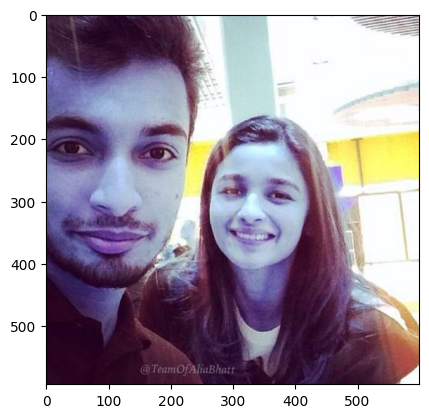

In [ ]:
import cv2
im=cv2.imread("/gdrive/MyDrive/sumana_nuig/mvsa/data/2490.jpg")
#G:\My Drive\sumana_nuig\mvsa\data
#im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#showarray(im_rgb)
plt.imshow(im)



In [ ]:

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load the pre-trained ResNet model
resnet = models.resnet50(pretrained=True)
# Set the model to evaluation mode
resnet.eval()

# Load and preprocess the image
image_path = '/gdrive/MyDrive/sumana_nuig/mvsa/data/2490.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])
input_image = preprocess(image).unsqueeze(0)

# Forward pass through the model
with torch.no_grad():
    features = resnet(input_image)

# Print the scene information
#print(features)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(features.shape)

torch.Size([1, 1000])


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from torchvision import utils

# Load the pre-trained VGG16 model
#vgg16 = models.inception_v3(pretrained=True)
#vgg16 = models.googlenet(pretrained=True)
vgg16 = models.alexnet(pretrained=True)
#vgg16 = models.Xception(pretrained=True)
# Set the model to evaluation mode
vgg16.eval()

# Load and preprocess the image
image_path = '/gdrive/MyDrive/sumana_nuig/mvsa/data/2490.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])
input_image = preprocess(image).unsqueeze(0)

# Forward pass through the model
with torch.no_grad():
    outputs = vgg16(input_image)

# Load the ImageNet class labels
with open('/gdrive/MyDrive/sumana_nuig/imagenet_classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Get the top 10 predictions and their corresponding labels
_, indices = torch.topk(outputs, 10)
predictions = [classes[idx] for idx in indices.squeeze().tolist()]

# Print the top 10 predictions/tags
print(predictions)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


['"neck brace",', '"seat belt",', '"square academic cap",', '"feather boa",', '"scarf",', '"hair spray",', '"Band-Aid",', '"wool",', '"academic gown",', '"bow tie",']


In [ ]:
vgg16=['"wig",', '"seat belt",', '"bow tie",', '"scarf",', '"sweatshirt",', '"neck brace",', '"academic gown",', '"suit",', '"square academic cap",', '"sunglasses",']
vgg19=['"seat belt",', '"wig",', '"sweatshirt",', '"lab coat",', '"neck brace",', '"bow tie",', '"square academic cap",', '"scarf",', '"academic gown",', '"stethoscope",']
resnet50=['"seat belt",', '"Band-Aid",', '"lab coat",', '"wig",', '"syringe",', '"square academic cap",', '"bolo tie",', '"academic gown",', '"stethoscope",', '"scarf",']
googlenet=['"square academic cap",', '"academic gown",', '"neck brace",', '"seat belt",', '"wig",', '"sweatshirt",', '"scarf",', '"fur coat",', '"suit",', '"bow tie",']
inception_v3=['"neck brace",', '"Band-Aid",', '"hair spray",', '"minibus",', '"sunscreen",', '"bridegroom",', '"seat belt",', '"wool",', '"academic gown",', '"lipstick",']
alexnet=['"neck brace",', '"seat belt",', '"square academic cap",', '"feather boa",', '"scarf",', '"hair spray",', '"Band-Aid",', '"wool",', '"academic gown",', '"bow tie",']
Class_attributes=['hair dark', 'nose white', 'nose small', 'man smiling', 'eyes brown', 'eyebrow dark', 'eye brown', 'eye brown', 'eye brown', 'hair brown', 'man smiling', 'face brown', 'window white', 'face smiling', 'hair brown', 'lips pink', 'collar black', 'hair smiling', 'eyes brown', 'shirt blue']
text=[ teamofaliabhatt unseen aliaa08 with fans]
Sentiment=text-neutral,image-positive

In [ ]:

!pip install CLIP

  Preparing metadata (setup.py) ... done
  Created wheel for CLIP: filename=clip-0.2.0-py3-none-any.whl size=6990 sha256=2ec5b710320657c44a2c4dcfae60ffb225a359a30e71db2fc1c02acd520823dd
  Stored in directory: /root/.cache/pip/wheels/7f/5c/e6/2c0fdb453a3569188864b17e9676bea8b3b7e160c037117869
Successfully built CLIP


In [ ]:
import torch
import CLIP
from PIL import Image

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Preprocess the image
def preprocess_image(im):
    image = Image.open(im)
    image = image.convert("RGB")
    image = image.resize((224, 224))
    image = preprocess(image).unsqueeze(0).to(device)
    return image

# Analyze sentiment of an image
def analyze_sentiment(im):
    image = preprocess_image(im)

    # Example text prompt for sentiment analysis
    text = clip.tokenize(["a happy image"]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        # Calculate sentiment scores
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)[0]
        sentiment_scores = {
            "Positive": round(similarity[1].item(), 2),
            "Negative": round(similarity[0].item(), 2)
        }

        return sentiment_scores

# Example usage
image_path = "path/to/your/image.jpg"
sentiment_scores = analyze_sentiment(image_path)
print(sentiment_scores)


ModuleNotFoundError: ignored

In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load pre-trained facial embedding model
face_cascade = cv2.CascadeClassifier('path_to_haar_cascade.xml')

# Extract facial embeddings from images
def extract_facial_embeddings(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over detected faces and extract facial features
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        # Perform facial feature extraction and obtain embeddings
        # Store the facial embeddings for each image

    # Return the facial embeddings
    return facial_embeddings

# Load global image features
global_features = np.load('global_features.npy')

# Load caption text features
caption_features = np.load('caption_features.npy')

# Load image paths and corresponding labels
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
labels = ['positive', 'negative', 'neutral']

# Initialize arrays to store features and labels
features = []
all_labels = []

# Iterate over image paths
for i, image_path in enumerate(image_paths):
    # Extract facial embeddings
    facial_embeddings = extract_facial_embeddings(image_path)

    # Concatenate global image features, caption text features, and facial embeddings
    combined_features = np.concatenate((global_features[i], caption_features[i], facial_embeddings))

    # Append the combined features and corresponding label
    features.append(combined_features)
    all_labels.append(labels[i])

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for test data
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


****

In [ ]:
#load csv files
#ddf=pd.read_csv('/kaggle/input/mvsa-multiple-attcsv/mvsa_multiple_attr.csv')
#df=pd.read_csv('/kaggle/input/simpson-attrbutes/simpson_attr_info.csv')
#df=pd.read_csv('/gdrive/MyDrive/sumana_nuig/mvsa_multiple/msva-multiple_jointlabel.csv')
df=pd.read_csv('/gdrive/MyDrive/sumana_nuig/mvsa_multiple/mvsa_multiple_attr_clean.csv')
#df=pd.read_csv('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_attr_info1.csv')
df=df.dropna()

#df1=df1.iloc[:100:,]
df.shape
#df[:2]

(17013, 15)

****DATA CLeaning****

In [ ]:
df[:2]

,ID,text_x,img_path,text_label,image_label,joint_label,text_y,object_names,object_score,att_name,att_score,joint_sentiment,class_att,bbox,text
0,2499,Knocked doors with the venerable #TeamTrudeau ...,2499.jpg,positive,positive,positive,Knocked doors with the venerable #TeamTrudeau ...,"['window', 'building', 'man', 'man', 'sign', '...","[0.8636385202407837, 0.8330612182617188, 0.830...","['white', 'white', 'standing', 'standing', 're...","[0.4545164406299591, 0.3220462203025818, 0.374...",positive,"['window white', 'building white', 'man standi...","[[0.0, 189.970458984375, 69.93639373779297, 37...",knock door venerable teamtrudeau lpc candidate...
1,2500,Canvassing for @ElectKellyYEG #yegfed #elxn42,2500.jpg,neutral,positive,positive,Canvassing for @ElectKellyYEG #yegfed #elxn42,"['door', 'door', 'door', 'boy', 'door', 'hair'...","[0.8792338371276855, 0.8491924405097961, 0.813...","['white', 'white', 'white', 'young', 'white', ...","[0.7257274985313416, 0.5963190197944641, 0.746...",positive,"['door white', 'door white', 'door white', 'bo...","[[2.5472946166992188, 0.0, 227.929931640625, 4...",canvassing electkellyyeg yegfed elxn42


In [ ]:
df.joint_sentiment.value_counts()

positive    11313
neutral      4402
negative     1298
Name: joint_sentiment, dtype: int64

In [ ]:
"""
#Blance data for MVSA-Multiple
# Downsample the data by randomly selecting 10% of the rows
#downsampled_data = data.sample(frac=0.1)

# Upsample the data by duplicating each row two times
neg=df1[df1['joint_sentiment']=='negative']
upsampled_neg = neg.reindex(neg.index.repeat(4))
print(upsampled_neg.shape)
nut=df1[df1['joint_sentiment']=='neutral']
#upsampled_nut = nut.reindex(nut.index.repeat(2))
#print(upsampled_nut.shape)
downsampled_nut = nut.sample(frac=0.2)
downsampled_nut=pd.concat([downsampled_nut,nut])
print(downsampled_nut.shape)
pos=df1[df1['joint_sentiment']=='positive']
downsampled_pos = pos.sample(frac=0.5)
print(downsampled_pos.shape)
#concat three sampling
df=pd.concat([downsampled_nut.iloc[:5000,:],upsampled_neg.iloc[:5000,:],downsampled_pos.iloc[:5000,:]])
#df=pd.concat([downsampled_pos,upsampled_nut,upsampled_neg])
#df=pd.concat([downsampled_pos,downsampled_nut,upsampled_neg])
print(df.shape)
df.joint_sentiment.value_counts()
"""

In [ ]:
"""
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_ros))
"""


In [ ]:
#get batch of 64 we need 2844 sample
#df=df.iloc[:4288:,]

In [ ]:

#remove duplicate pairs of words from class_att
def drop_dupli(text):
    #seen = set()
    result = []
    seen=[]
    #c=0
    for item in text.split():
       # seen=[]
        if item not in seen:
            #seen.add(item)
            seen.append(item)
            result.append(item)
    return " ".join(result)
df['class_att1'] = df['class_att'].apply(drop_dupli)
#df['class_att1'] = df['class_att'].apply(lambda x: list(dict.fromkeys(x)))
#df.class_att1
#df['newame'] = df['Names'].apply(lambda x: list(dict.fromkeys(x)))
#print (df)


In [ ]:
"""
#Blance data for Simpson
# Downsample the data by randomly selecting 10% of the rows
#downsampled_data = data.sample(frac=0.1)

# Upsample the data by duplicating each row two times
neg=df1[df1['joint_sentiment']=='negative']
upsampled_neg = neg.reindex(neg.index.repeat(2))
print(upsampled_neg.shape)
nut=df1[df1['joint_sentiment']=='neutral']
#upsampled_nut = nut.reindex(nut.index.repeat(2))
#print(upsampled_nut.shape)
#downsampled_nut = nut.sample(frac=0.2)
#downsampled_nut=pd.concat([downsampled_nut,nut])
#print(downsampled_nut.shape)
pos=df1[df1['joint_sentiment']=='positive']
#downsampled_pos = pos.sample(frac=0.5)
#print(downsampled_pos.shape)
#concat three sampling
df=pd.concat([nut,upsampled_neg.iloc[:1016,:],pos])
#df=pd.concat([downsampled_pos,upsampled_nut,upsampled_neg])
#df=pd.concat([downsampled_pos,downsampled_nut,upsampled_neg])
print(df.shape)
df.joint_sentiment.value_counts()
"""

**Balancing data in the dataframe**

In [ ]:
"""
#Blance data for MVSA-Single
# Downsample the data by randomly selecting 10% of the rows
#downsampled_data = data.sample(frac=0.1)

# Upsample the data by duplicating each row two times
neg=df1[df1['joint_sentiment']=='negative']
upsampled_neg = neg.reindex(neg.index.repeat(2))
upsampled_neg=upsampled_neg.iloc[:2593,:]
#print(upsampled_neg.shape)
nut=df1[df1['joint_sentiment']=='neutral']
upsampled_nut = nut.reindex(nut.index.repeat(6))
upsampled_nut=upsampled_nut.iloc[:2593,:]
print(upsampled_nut.shape)
pos=df1[df1['joint_sentiment']=='positive']
upsampled_pos=pos.iloc[:2593,:]
#concat three sampling
df=pd.concat([upsampled_pos,upsampled_nut,upsampled_neg])
#df=pd.concat([pos,upsampled_nut,upsampled_neg])
df.joint_sentiment.value_counts()
print(df.shape)
"""

In [ ]:
df[:2]

,img_path,text,object_names,object_score,att_name,att_score,joint_sentiment,class_att,bbox
22,24.jpg,looking forward to disgraced by ayad akhtar mo...,"['man', 'suit', 'sign', 'hair', 'man', 'man', ...","[0.7883239984512329, 0.7631262540817261, 0.724...","['white', 'gray', 'white', 'short', 'black', '...","[0.152995303273201, 0.39513760805130005, 0.339...",neutral,"['man white', 'suit gray', 'sign white', 'hair...","[[168.68898010253906, 108.79108428955078, 568...."
23,25.jpg,rt curiosityhouse author carolynjmorris reads ...,"['woman', 'hair', 'hair', 'girl', 'table', 'gi...","[0.7949923276901245, 0.7783167362213135, 0.719...","['sitting', 'dark', 'brown', 'little', 'green'...","[0.23358863592147827, 0.2890821099281311, 0.38...",neutral,"['woman sitting', 'hair dark', 'hair brown', '...","[[165.5518341064453, 8.726630210876465, 439.41..."


In [ ]:
import re
df["text"] = df["text"].apply(lambda x: re.sub("[\[{','}\]]", ' ', str(x)).strip())#captin text
df["class_att1"] = df["class_att1"].apply(lambda x: re.sub("[\[{','}\]]", ' ', str(x)).strip())#class-attributes pair
df["class_names"] = df["object_names"].apply(lambda x: re.sub("[\[{','}\]]", ' ', str(x)).strip())#class names
df["cbt_class_attribute"]=df["text"].str.cat(df["class_att1"])#Combined caption and class-attributes pairs
df["cbt_class"]=df["text"].str.cat(df["class_names"])#Combined caption and class-attributes pairs
#df[:2]
#df["obj_name"] = df["object_names"].apply(lambda x: re.sub("[\[{','}\]]", ' ', str(x)).strip())
#df["att_name"] = df["att_name"].apply(lambda x: re.sub("[\[{','}\]]", ' ', str(x)).strip())




In [ ]:
#!install nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
"""
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)
df['text']=df['text'].apply(remove_stop_words)
"""

"\nimport nltk\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nstop_words = set(stopwords.words('english'))\n\ndef remove_stop_words(text):\n    words = word_tokenize(text)\n    words = [word for word in words if word.lower() not in stop_words]\n    return ' '.join(words)\ndf['text']=df['text'].apply(remove_stop_words)\n"

In [ ]:
#df1["object_attr_ctext"]=df1["object_names"].str.cat(df1["att_name"])
#df["object_attr_text"]=df["class_att"].str.cat(df["text"])
#df["cbt"]=df["text"].str.cat(df["class_att1"])
#df[:2]

In [ ]:
"""
from sklearn.model_selection import train_test_split
#df1, test_df = train_test_split(df, test_size=0.10,random_state=42)
train_df, test_df = train_test_split(df, test_size=0.1)
print(train_df.shape,test_df.shape)
"""

(900, 11) (100, 11)


In [ ]:
"""
#Blance data for MVSA-Multiple
# Downsample the data by randomly selecting 10% of the rows
#downsampled_data = data.sample(frac=0.1)

# Upsample the data by duplicating each row two times
neg=df1[df1['joint_sentiment']=='negative']
upsampled_neg = neg.reindex(neg.index.repeat(5))
print(upsampled_neg.shape)
nut=df1[df1['joint_sentiment']=='neutral']
upsampled_nut = nut.reindex(nut.index.repeat(2))
print(upsampled_nut.shape)
#downsampled_nut = nut.sample(frac=0.2)
#downsampled_nut=pd.concat([downsampled_nut,nut])
#print(downsampled_nut.shape)
pos=df1[df1['joint_sentiment']=='positive']
#downsampled_pos = pos.sample(frac=0.5)
print(pos.shape)
#concat three sampling
train_df=pd.concat([upsampled_nut.iloc[:5000,:],upsampled_neg.iloc[:4500,:],pos.iloc[:4500,:]])
#df=pd.concat([downsampled_pos,upsampled_nut,upsampled_neg])
#df=pd.concat([downsampled_pos,downsampled_nut,upsampled_neg])
#print(df.shape)
train_df.joint_sentiment.value_counts()
"""

In [ ]:
"""
#y_train=pd.get_dummies(train_df.joint_sentiment)
#y_test=pd.get_dummies(test_df.joint_sentiment)
#y_train=pd.get_dummies(train_df.image_label)
#y_test=pd.get_dummies(test_df.image_label)
#y_val=pd.get_dummies(val_df.joint_sentiment)
def get_label_code(text):
    if text=='positive':
        return 2
    elif text=='neutral':
        return 1
    else :
        return 0
#test_df['jlabel']=test_df['joint_label'].apply(get_label_code)
test_df['jlabel']=test_df['joint_sentiment'].apply(get_label_code)
#test_df['jlabel']=test_df['afc'].apply(get_label_code)
#test_df['ilabel']=test_df['image_label'].apply(get_label_code)
#test_df['tlabel']=test_df['tsentiment'].apply(get_label_code)
#test_df[:2]
"""

"\ndef get_label_code(text):\n    if text=='positive':\n        return 2\n    elif text=='neutral':\n        return 1\n    else :\n        return 0\n#test_df['jlabel']=test_df['joint_label'].apply(get_label_code)\ntest_df['jlabel']=test_df['joint_sentiment'].apply(get_label_code)\n#test_df['jlabel']=test_df['afc'].apply(get_label_code)\n#test_df['ilabel']=test_df['image_label'].apply(get_label_code)\n#test_df['tlabel']=test_df['tsentiment'].apply(get_label_code)\n#test_df[:2]\n"

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
#Glob tokenizer
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling2D,Bidirectional, LSTM, Dense, Input, Flatten,Dropout,GlobalMaxPool1D,MaxPooling1D,Concatenate
from tensorflow.keras.layers import SpatialDropout1D

In [ ]:
"""
print("max len of tweets",max([len(x.split()) for x in train_df.cbt]))
print("max len of tweets",max([len(x.split()) for x in train_df.class_att1]))
"""

'\nprint("max len of tweets",max([len(x.split()) for x in train_df.cbt]))\nprint("max len of tweets",max([len(x.split()) for x in train_df.class_att1]))\n'

In [ ]:
GLOVE_EMB = '/gdrive/MyDrive/sumana_nuig/glove.6B.300d.txt'
EMBEDDING_DIM = 300

**Sentiment of Combined text: which is concatenation of image description and Caption Text with that image **

In [ ]:
#creating text vector, vocab size,and embedding layer
def load_tarin_test_dataset(df,col,str_len):
    column=col
    max_len=str_len
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts( df[column])
    #tokenizer.fit_on_texts(train_df.object_attr1_text)
    #tokenizer.fit_on_texts(train_df.text)
    #tokenizer1.fit_on_texts(test_data)

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    #print("Vocabulary Size :", vocab_size)

    #jx_train = pad_sequences(tokenizer.texts_to_sequences(train_df.text), maxlen = max_len)
    x_df = pad_sequences(tokenizer.texts_to_sequences( df[column]), maxlen = max_len)
    #x_val = pad_sequences(tokenizer.texts_to_sequences(val_df.class_att), maxlen = 32)
    #jx_test = pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen =max_len )
    #x_test = pad_sequences(tokenizer.texts_to_sequences( test[column]), maxlen =max_len )
    #y_train, y_test = train_test_split(y, test_size=1-TRAIN_SIZE,random_state=7) # Splits Dataset into Training and Testing set
    #y_train, y_test = train_test_split(df['POSITIVE'], test_size=1-TRAIN_SIZE,random_state=7)
    embeddings_index = {}

    f = open(GLOVE_EMB, encoding="utf8")
    for line in f :
        values = line.split()
        word = value = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    print('Found %s word vectors.' %len(embeddings_index))
    embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    print(embedding_matrix.shape)
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_len,#MAX_SEQUENCE_LENGTH,
                                          trainable=False)
    return x_df,vocab_size,embedding_layer



In [ ]:
def bilstm_model(tx_df,embeding_layer):

    embedding_sequences = embedding_layer(tx_df)
    #embedding_sequences = embedding_layer(sequence_input)
    txt = SpatialDropout1D(0.1)(embedding_sequences)
    #txt=Conv1D(100, 4,activation='relu')(txt)#(tembedding_sequences)#(x)
    txt = Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.2))(txt)#(tembedding_sequences)
    #ttxtb = Dense(256, activation='tanh')(txtb)
    txt = Dense(512, activation='relu')(txt)
    return txt

In [ ]:
def tbilstm_model(tx_df,embeding_layer):

    embedding_sequences = embedding_layer(tx_df)
    #embedding_sequences = embedding_layer(sequence_input)
    txt = SpatialDropout1D(0.1)(embedding_sequences)
    #txt=Conv1D(100, 4,activation='relu')(txt)#(tembedding_sequences)#(x)
    txt = Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.2))(txt)#(tembedding_sequences)
    ttxtb = Dense(256, activation='tanh')(txt)
    #txt = Dense(512, activation='relu')(txt)
    return ttxtb
tclass_features=tbilstm_model(class_df,embedding_layer)
print((np.array(tclass_features)).shape)


(17013, 256)


In [ ]:

"""
#module for extracting text features
def cnn_model_for_text(num_filters,kernel_size,tx_df,embeding_layer):

    num_filters=num_filters
    kernel_size=kernel_size

    #jsequence_input = Input(shape=(maxlen,), dtype='int32')
    #sequence_input = Input(shape=(max_len,), dtype='int32')
    #embedding_sequences = embedding_layer(sequence_input)
    embedding_sequences = embedding_layer(tx_df)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    conv_layers = []
    for num_filters,kernel_size in zip(num_filters,kernel_size):
        conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')(x)#(jembedding_sequences)
        pool_layer = MaxPooling1D(pool_size=max_len - kernel_size + 1)(conv_layer)
        #pool_layer = MaxPooling1D()(conv_layer)
        #pool_layer = tf.keras.layers.Reshape((1, -1))(pool_layer)
        conv_layers.append(pool_layer)

    #Concatenate all convolutional layers
    concatenate_layer = tf.keras.layers.Concatenate()(conv_layers)
    flatten_layer = Flatten()(concatenate_layer)
    x = Dropout(0.5)(flatten_layer)#(x)
    #txt = Dense(256, activation='tanh')(x)
    txt = Dense(256, activation='relu')(x)

    return txt
#modelse=cnn_model(num_filters,kernel_sizes,max_len,embedding_layer)
"""

In [ ]:
#caption text features collection
max_len=max([len(x.split()) for x in df.text])
#tx_train,tx_test,vocab_size,embedding_layer=load_tarin_test_dataset(train_df,test_df,'text',max([len(x.split()) for x in train_df.text]))
tx_df,vocab_size,embedding_layer=load_tarin_test_dataset(df,'text',max_len)
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",tx_df.shape)
#print("Testing X Shape:",tx_test.shape)

#call cnn model
kernel_sizes = [3,4,5]
num_filters = [16,32,64]

#text_features=cnn_model_for_text(num_filters,kernel_sizes,tx_df,embedding_layer)
#text_features=np.array(text_features)
#print(text_features.shape)
#print((np.array(text_features)).shape)
bilstm_text_features=bilstm_model(tx_df,embedding_layer)
print((np.array(bilstm_text_features)).shape)

Found 400000 word vectors.
(32194, 300)
Vocabulary Size : 32194
Training X Shape: (17013, 19)


(17013, 512)


In [ ]:
#class features collection
max_len=max([len(x.split()) for x in df.object_names])
#tx_train,tx_test,vocab_size,embedding_layer=load_tarin_test_dataset(train_df,test_df,'text',max([len(x.split()) for x in train_df.text]))
class_df,vocab_size,embedding_layer=load_tarin_test_dataset(df,'object_names',max_len)
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",class_df.shape)
#print("Testing X Shape:",tx_test.shape)

#call cnn model
kernel_sizes = [2,3,4]
num_filters = [8,16,32]
#class_features=cnn_model_for_text(num_filters,kernel_sizes,class_df,embedding_layer)
#print((np.array(class_features)).shape)
class_features=bilstm_model(class_df,embedding_layer)
print((np.array(class_features)).shape)


Found 400000 word vectors.
(972, 300)
Vocabulary Size : 972
Training X Shape: (17013, 34)
(17013, 512)


**Extract Class-attributes features **

In [ ]:

#class attributes features
max_len=max([len(x.split()) for x in df.class_att1])
#tx_train,tx_test,vocab_size,embedding_layer=load_tarin_test_dataset(train_df,test_df,'text',max([len(x.split()) for x in train_df.text]))
classatt_df,vocab_size,embedding_layer=load_tarin_test_dataset(df,'class_att1',max_len)
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",classatt_df.shape)
#print("Testing X Shape:",jx_test.shape)
#call cnn
kernel_sizes = [2,3,4]
num_filters = [8,16,32]
#class_attributes_features=cnn_model_for_text(num_filters,kernel_sizes,classatt_df,embedding_layer)
#print((np.array(class_attributes_features)).shape)
class_attributes_features=bilstm_model(classatt_df,embedding_layer)
print((np.array(class_attributes_features)).shape)


Found 400000 word vectors.
(1029, 300)
Vocabulary Size : 1029
Training X Shape: (17013, 30)
(17013, 512)


In [ ]:
#combined-text-features with class collection
max_len=max([len(x.split()) for x in df.cbt_class])
#tx_train,tx_test,vocab_size,embedding_layer=load_tarin_test_dataset(train_df,test_df,'text',max([len(x.split()) for x in train_df.text]))
combined_text_class,vocab_size,embedding_layer=load_tarin_test_dataset(df,'cbt_class',max_len)
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",combined_text_class.shape)
#print("Testing X Shape:",jx_test.shape)
#call cnn
#kernel_sizes = [3,4,5]
#num_filters = [16,32,64]
#cbt_class_features=cnn_model_for_text(num_filters,kernel_sizes,combined_text_class,embedding_layer)
#print((np.array(cbt_class_features)).shape)
cbt_class_features=bilstm_model(combined_text_class,embedding_layer)
print((np.array(cbt_class_features)).shape)


Found 400000 word vectors.
(39416, 300)
Vocabulary Size : 39416
Training X Shape: (17013, 45)


(17013, 512)


In [ ]:
#combined-text-features with class-attributes collection
max_len=max([len(x.split()) for x in df.cbt_class_attribute])
#tx_train,tx_test,vocab_size,embedding_layer=load_tarin_test_dataset(train_df,test_df,'text',max([len(x.split()) for x in train_df.text]))
combined_text_att,vocab_size,embedding_layer=load_tarin_test_dataset(df,'cbt_class_attribute',max_len)
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",combined_text_att.shape)
#print("Testing X Shape:",jx_test.shape)
#call cnn
kernel_sizes = [3,4,5]
num_filters = [16,32,64]
#cbt_class_attributes_features=cnn_model_for_text(num_filters,kernel_sizes,combined_text_att,embedding_layer)
#print((np.array(cbt_class_attributes_features)).shape)
bilstm_cbt_class_attributes_features=bilstm_model(combined_text_att,embedding_layer)
print((np.array(bilstm_cbt_class_attributes_features)).shape)

Found 400000 word vectors.
(39470, 300)
Vocabulary Size : 39470
Training X Shape: (17013, 43)


(17013, 512)


**Visual Features Extraction**

In [ ]:
from tensorflow.keras.applications import VGG16,VGG19,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import Input,Dense, Dropout, Flatten,BatchNormalization,concatenate,Bidirectional,LSTM
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
# Instantiate convolutional base mode for whole image
image_input = Input(shape=(224, 224, 3), name='image')
resnet = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))#(image_input)
for layer in resnet.layers:
    layer.trainable=False
#res_layer = Dense(256, activation='tanh')(resnet)
res_layer=Flatten()(resnet.output)
global_features = Dense(512, activation='relu')(res_layer)
#res_layer1 = Dense(256, activation='relu')(res_layer)
#res_layer = Dense(256, activation='relu')(resnet.output)
#res_layer = Flatten()(resnet.output) #(vgg16)#
#res_layer_32=Dense(32, activation='relu')(res_layer)
###rmodel = tf.keras.Model(inputs=resnet.input, outputs=vprediction)

**Object visual featutes**

In [ ]:
#print((np.array(img_file)).shape) #a
#print((np.array(global_features)).shape)#b
#print((np.array(local_object_features)).shape)#c
#np.savez('my_arrays.npz', a=arr1, b=arr2)
np.savez('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_single_300_sample.npz',a=np.array(img_file) ,b=np.array(global_features),c=np.array(local_object_features))

In [ ]:
data = np.load('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_multiple.npz')

# Access the variables inside the npz file
img_file = data['a']
global_features = data['b']
local_object_features = data['c']
print(global_features.shape,local_object_features.shape)

(17013, 256) (17013, 256)


In [ ]:
img_file=df['img_path'].tolist()
target_labels=df['joint_sentiment'].tolist()
#image features
print((np.array(img_file)).shape)#a
print((np.array(global_features)).shape)#b
print((np.array(local_object_features)).shape)#c
#text features
print((np.array(text_features)).shape)#d
print((np.array(class_features)).shape)#e
print((np.array(class_attributes_features)).shape)#f
print((np.array(cbt_class_features)).shape)#g
print((np.array(cbt_class_attributes_features)).shape)#h
print((np.array(target_labels)).shape)

(17013,)
(17013, 256)
(17013, 256)
(17013, 256)
(17013, 256)
(17013, 256)
(17013, 256)
(17013, 256)
(17013,)


In [ ]:
np.savez('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_multiple_allfeatures.npz',
            img_file=np.array(img_file),
            global_features=np.array(global_features),
            local_object_features=np.array(local_object_features),
            text_features=np.array(text_features),
            class_features=np.array(class_features),
            class_attributes_features=np.array(class_attributes_features),
            cbt_class_features=np.array(cbt_class_features),
            cbt_class_attributes_features=np.array(cbt_class_attributes_features),
            target_labels=np.array(target_labels))

In [ ]:
#data = np.load('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_single_allfeatures.npz')
data = np.load('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_multiple_allfeatures.npz')


# Access the variables inside the npz file
img_file = data['img_file']
global_features = data['global_features']
local_object_features = data['local_object_features']
#text_features=data['text_features']
#class_features=data['class_features']
#class_attributes_features=data['class_attributes_features']
#cbt_class_features=data['cbt_class_features']
#cbt_class_attributes_features=data['cbt_class_attributes_features']
target_labels=data['target_labels']
print(global_features.shape,local_object_features.shape,target_labels.shape)

(17013, 256) (17013, 256) (17013,)


In [ ]:
"""
data = np.load('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_single_allfeatures.npz')
#data = np.load('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_multiple_allfeatures.npz')


# Access the variables inside the npz file
img_file = data['img_file']
global_features = data['global_features']
local_object_features = data['local_object_features']
target_labels=data['target_labels']
"""

In [ ]:
"""
img_file=df['img_path'].tolist()
#image features
print((np.array(img_file)).shape)#a
print((np.array(global_features)).shape)#b
print((np.array(local_object_features)).shape)#c
#text features
print((np.array(text_features)).shape)#d
print((np.array(class_features)).shape)#e
print((np.array(class_attributes_features)).shape)#f
print((np.array(combined_text_class_features)).shape)#g
print((np.array(combined_text_att_features)).shape)#h
#np.savez('my_arrays.npz', a=arr1, b=arr2)
np.savez('/kaggle/working/mvsa_single_df1.npz',
            a=np.array(img_file),
            b=np.array(global_features),
            c=np.array(local_object_features),
            d=np.array(text_features),
            e=np.array(class_features),
            f=np.array(class_attributes_features),
            g=np.array(combined_text_class_features),
            h=np.array(combined_text_att_features))#h
"""

In [ ]:
#Cross attention of object_features and class_features with batch size
import torch
import torch.nn as nn
import numpy as np
#train_classat_features, rtrain_object_features, rtrain_object_features)
text=np.array(tclass_features)#class features
#text=np.array(class_attributes_features)
#text=np.array(text_features) #class-attributes pair features
print(text.shape)
image=np.array(local_object_features)
#image=image_features_arr
#image=np.array(global_features)
print(image.shape)
# Convert numpy arrays to torch tensors
text_tensor = torch.from_numpy(text)
text_tensor=text_tensor.unsqueeze(2)
#text_tensor=text_tensor.permute(0, 1)
image_tensor = torch.from_numpy(image)
image_tensor=image_tensor.unsqueeze(2)
#image_tensor=image_tensor.permute(0, 1)

# Define a cross-attention model
class CrossAttention(nn.Module):
    def __init__(self, text_dim, image_dim):
        super(CrossAttention, self).__init__()
        self.text_dim = text_dim
        self.image_dim = image_dim
        #self.linear_text = nn.Linear(text_dim, image_dim)
        #self.linear_image = nn.Linear(image_dim, text_dim)

    def forward(self, text_tensor, image_tensor):
        # Compute attention weights

        self.text_tensor = text_tensor
        self.image_tensor = image_tensor

        # Compute attended features

        attention_score = torch.bmm(image_tensor.transpose(1, 2), text_tensor)

        attention_score = torch.softmax(attention_score, dim=1)
        #attention_score = attention_score.unsqueeze(2) # transpose back to [batch_size, sequence_length, feature_dim]
        context = (torch.bmm(image_tensor,attention_score.transpose(1,2)))
        #image_attended = torch.matmul(text_att.transpose(0, 1), image)
        #image_attended = image_attended.transpose(0, 1)
        print(context.shape)
        print(image_tensor.shape)
        # Concatenate attended features
        attended_features = torch.cat([context, image_tensor], dim=1)

        return attended_features

# Instantiate the cross-attention model
cross_att = CrossAttention(text_dim=text.shape[1], image_dim=image.shape[1])
#cross_att = CrossAttention(text_dim=(text.shape), image_dim=(image.shape))

# Perform cross-attention
attended_features1 = cross_att(text_tensor.float(), image_tensor.float())
attended_features = attended_features1.squeeze(2)
print(attended_features.shape)
# Convert the attended features back to numpy array
object_class_features = attended_features.detach().numpy()
print(object_class_features.shape)



(17013, 256)
(17013, 256)
torch.Size([17013, 256, 1])
torch.Size([17013, 256, 1])
torch.Size([17013, 512])
(17013, 512)


In [ ]:
#Cross attention of object_features and class_features with batch size
import torch
import torch.nn as nn
import numpy as np
#train_classat_features, rtrain_object_features, rtrain_object_features)
text=np.array(tclass_features)#class features
#text=np.array(class_attributes_features)
#text=np.array(bilstm_text_features) #class-attributes pair features
#text=np.array(text_features)
print(text.shape)
#image=np.array(local_object_features)
#image=image_features_arr
image=np.array(global_features)
print(image.shape)
# Convert numpy arrays to torch tensors
text_tensor = torch.from_numpy(text)
text_tensor=text_tensor.unsqueeze(2)
#text_tensor=text_tensor.permute(0, 1)
image_tensor = torch.from_numpy(image)
image_tensor=image_tensor.unsqueeze(2)
#image_tensor=image_tensor.permute(0, 1)

# Define a cross-attention model
class CrossAttention(nn.Module):
    def __init__(self, text_dim, image_dim):
        super(CrossAttention, self).__init__()
        self.text_dim = text_dim
        self.image_dim = image_dim
        #self.linear_text = nn.Linear(text_dim, image_dim)
        #self.linear_image = nn.Linear(image_dim, text_dim)

    def forward(self, text_tensor, image_tensor):
        # Compute attention weights

        self.text_tensor = text_tensor
        self.image_tensor = image_tensor

        # Compute attended features

        attention_score = torch.bmm(image_tensor.transpose(1, 2), text_tensor)

        attention_score = torch.softmax(attention_score, dim=1)
        #attention_score = attention_score.unsqueeze(2) # transpose back to [batch_size, sequence_length, feature_dim]
        context = (torch.bmm(image_tensor,attention_score.transpose(1,2)))
        #image_attended = torch.matmul(text_att.transpose(0, 1), image)
        #image_attended = image_attended.transpose(0, 1)
        print(context.shape)
        print(image_tensor.shape)
        # Concatenate attended features
        attended_features = torch.cat([context, image_tensor], dim=1)

        return attended_features

# Instantiate the cross-attention model
cross_att = CrossAttention(text_dim=text.shape[1], image_dim=image.shape[1])
#cross_att = CrossAttention(text_dim=(text.shape), image_dim=(image.shape))

# Perform cross-attention
attended_features2 = cross_att(text_tensor.float(), image_tensor.float())
attended_features2 = attended_features2.squeeze(2)
print(attended_features2.shape)
# Convert the attended features back to numpy array
object_class_features2 = attended_features2.detach().numpy()
print(object_class_features2.shape)



(17013, 256)
(17013, 256)
torch.Size([17013, 256, 1])
torch.Size([17013, 256, 1])
torch.Size([17013, 512])
(17013, 512)


In [ ]:
#Cross attention of object_features and class_features with batch size
import torch
import torch.nn as nn
import numpy as np
#train_classat_features, rtrain_object_features, rtrain_object_features)
#text=np.array(class_features)#class features
#text=np.array(class_attributes_features)
text=np.array(combined_features2) #class-attributes pair features
#text=np.array(text_features)
print(text.shape)
#image=np.array(local_object_features)
image=np.array(combined_features1)
#image=np.array(global_features)
print(image.shape)
# Convert numpy arrays to torch tensors
text_tensor = torch.from_numpy(text)
text_tensor=text_tensor.unsqueeze(2)
#text_tensor=text_tensor.permute(0, 1)
image_tensor = torch.from_numpy(image)
image_tensor=image_tensor.unsqueeze(2)
#image_tensor=image_tensor.permute(0, 1)

# Define a cross-attention model
class CrossAttention(nn.Module):
    def __init__(self, text_dim, image_dim):
        super(CrossAttention, self).__init__()
        self.text_dim = text_dim
        self.image_dim = image_dim
        #self.linear_text = nn.Linear(text_dim, image_dim)
        #self.linear_image = nn.Linear(image_dim, text_dim)

    def forward(self, text_tensor, image_tensor):
        # Compute attention weights

        self.text_tensor = text_tensor
        self.image_tensor = image_tensor

        # Compute attended features

        attention_score = torch.bmm(image_tensor.transpose(1, 2), text_tensor)

        attention_score = torch.softmax(attention_score, dim=1)
        #attention_score = attention_score.unsqueeze(2) # transpose back to [batch_size, sequence_length, feature_dim]
        context = (torch.bmm(image_tensor,attention_score.transpose(1,2)))
        #image_attended = torch.matmul(text_att.transpose(0, 1), image)
        #image_attended = image_attended.transpose(0, 1)
        print(context.shape)
        print(image_tensor.shape)
        # Concatenate attended features
        attended_features = torch.cat([context, image_tensor], dim=1)

        return attended_features

# Instantiate the cross-attention model
cross_att = CrossAttention(text_dim=text.shape[1], image_dim=image.shape[1])
#cross_att = CrossAttention(text_dim=(text.shape), image_dim=(image.shape))

# Perform cross-attention
attended_features3 = cross_att(text_tensor.float(), image_tensor.float())
attended_features3 = attended_features3.squeeze(2)
print(attended_features3.shape)
# Convert the attended features back to numpy array
object_class_features3 = attended_features3.detach().numpy()
print(object_class_features3.shape)



(17013, 1024)
(17013, 1024)
torch.Size([17013, 1024, 1])
torch.Size([17013, 1024, 1])
torch.Size([17013, 2048])
(17013, 2048)


In [ ]:
combined_features1 = np.concatenate([object_class_features,object_class_features2], axis=1)


In [ ]:
print(combined_features1.shape,combined_features2.shape)

(17013, 1024) (17013, 1024)


In [ ]:
#combined_features2 = np.concatenate([text_features,class_attributes_features], axis=1)
combined_features2 = np.concatenate([bilstm_text_features,class_attributes_features], axis=1)
print(combined_features2.shape)


(17013, 1024)


In [ ]:
def bilstm_features(input):
    bilstm = Bidirectional(LSTM(512, dropout=0.1, recurrent_dropout=0.1))(input)
    #bilstm = LSTM(512,dropout=0.1, recurrent_dropout=0.1)(input)
    bilstm = Dense(512, activation='relu')(bilstm)
    return bilstm

input_shape = (combined_features2.shape[1], 1)  # Assuming combined_features1 is a 2D array
#combined_features1 = combined_features1.reshape((combined_features1.shape[0], combined_features1.shape[1], 1))
combined_features2 = combined_features2.reshape((combined_features2.shape[0], combined_features2.shape[1], 1))
bilstm = bilstm_features(combined_features2)

In [ ]:
bilstmar=np.array(bilstm)
print(bilstmar.shape)

(17013, 512)


**End**

In [ ]:
from sklearn.model_selection import train_test_split
#combined_features = np.concatenate([global_features,text_features,object_class_features3], axis=1)
#combined_features = np.concatenate([bilstmar,cbt_class_attributes_features], axis=1)
#combined_features = np.concatenate([class_features,global_features,text_features], axis=1)
#combined_features = np.concatenate([text_features,global_features,object_class_features], axis=1)
#combined_features = np.concatenate([object_class_features,object_class_features2,bilstm_text_features], axis=1)
#combined_features = np.concatenate([combined_features1,combined_features2,global_features], axis=1)
#combined_features = np.concatenate([global_features,text_features,object_class_features], axis=1)
#combined_features = np.concatenate([global_features,object_class_features,cbt_class_attributes_features], axis=1)
#combined_features = np.concatenate([text_features,global_features,local_object_features,class_features], axis=1)
#combined_features = np.concatenate([global_features,text_features,local_object_features,object_class_features,object_class_features2,object_class_features2], axis=1)
#combined_features = np.concatenate([object_class_features,class_attributes_features], axis=1)
# assuming X is the concatenated feature vector and y is the label for each data point
X_train, X_test, y_train, y_test = train_test_split(object_class_features3, df.joint_label, test_size=0.1)
#X_train, X_test, y_train, y_test = train_test_split(combined_global_local_text_features, df.joint_sentiment, test_size=0.1, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(combined_features, target_labels, test_size=0.1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(15311, 2048) (1702, 2048) (15311,) (1702,)


In [ ]:
print(combined_features.shape)

(17013, 768)


In [ ]:
y_train = pd.get_dummies(y_train)
def get_label_code(text):
    if text=='positive':
        return 2
    elif text=='neutral':
        return 1
    else :
        return 0
#vectorize function
my_vectorized_function = np.vectorize(get_label_code)
y_test = my_vectorized_function(y_test)
#y_test=y_test.apply(get_label_code)

Epoch 1/50
108/108 [==============================] - 1s 4ms/step - loss: 0.9827 - accuracy: 0.6201 - val_loss: 0.8185 - val_accuracy: 0.6351
Epoch 2/50
108/108 [==============================] - 0s 3ms/step - loss: 0.7964 - accuracy: 0.6667 - val_loss: 0.7837 - val_accuracy: 0.6449
Epoch 3/50
108/108 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.6693 - val_loss: 0.8330 - val_accuracy: 0.6547
Epoch 4/50
108/108 [==============================] - 0s 3ms/step - loss: 0.7614 - accuracy: 0.6701 - val_loss: 0.7994 - val_accuracy: 0.6260
Epoch 5/50
108/108 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.6786 - val_loss: 0.7960 - val_accuracy: 0.6625
Epoch 6/50
108/108 [==============================] - 0s 3ms/step - loss: 0.7393 - accuracy: 0.6775 - val_loss: 0.8040 - val_accuracy: 0.6567
Epoch 7/50
108/108 [==============================] - 0s 3ms/step - loss: 0.7437 - accuracy: 0.6778 - val_loss: 0.7793 - val_accuracy: 0.6514
Epoch 

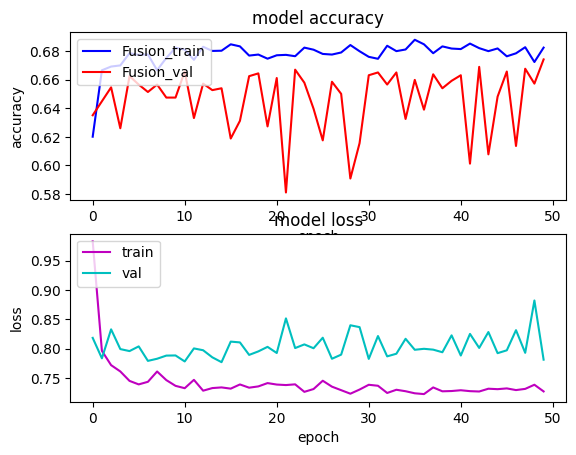

In [ ]:
###Design Fusion Model
with tf.device('/device:GPU:0'): #when GPU is used

  #print(combined_global_local_text_features.shape)
  fusion_model = tf.keras.models.Sequential([
      #tf.keras.layers.Dense(512, activation='relu', input_shape=(combined_features.shape[1],)),
      tf.keras.layers.Dense(3, activation='softmax', input_shape=(combined_features.shape[1],))
      #tf.keras.layers.Dropout(0.5),
      #tf.keras.layers.Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      #tf.keras.layers.Dropout(0.2),
      #tf.keras.layers.Dense(128, activation='relu'),
      #tf.keras.layers.Dense(3,kernel_regularizer=tf.keras.regularizers.l1(0.01), activation='softmax')
      #tf.keras.layers.Dense(3, activation='softmax')
  ])
  # assuming X is the concatenated feature vector and y is the label for each data point
  fusion_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',
                metrics=['accuracy'])
  #fusion_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  #fusion_model.fit(test_combined_global_local_text_features, y_test, epochs=5)
  com_history=fusion_model.fit(x=X_train,validation_split=0.1,y= y_train,batch_size=128, epochs=200)
  #com_history=fusion_modelfit(x=X_train, y_train, epochs=20,batch_size=128, validation_split=0.1,validation_data=(X_test, y_test))

  #accuracy vs loss function
  s, (at, al) = plt.subplots(2,1)
  at.plot(com_history.history['accuracy'], c= 'b')
  at.plot(com_history.history['val_accuracy'], c='r')
  at.set_title('model accuracy')
  at.set_ylabel('accuracy')
  at.set_xlabel('epoch')
  at.legend(['Fusion_train', 'Fusion_val'], loc='upper left')

  al.plot(com_history.history['loss'], c='m')
  al.plot(com_history.history['val_loss'], c='c')
  al.set_title('model loss')
  al.set_ylabel('loss')
  al.set_xlabel('epoch')
  al.legend(['train', 'val'], loc = 'upper left')
  f1predicted = fusion_model.predict(X_test)
  #com_score=fusion_model.evaluate(y_test)
  #print('Test Loss:', com_score[0])
  #print('Test accuracy:', com_score[1])
  f1ypredicted = np.argmax(f1predicted,axis=1)
  #y_predicted = np.where(predicted>0.5,1,0)
  print('Results of Fusion model')
  from sklearn.metrics import classification_report
  print(classification_report(y_test,f1ypredicted,digits=4))

Epoch 1/10
108/108 [==============================] - 81s 738ms/step - loss: 0.9070 - categorical_accuracy: 0.6519 - val_loss: 0.8546 - val_categorical_accuracy: 0.6704
Epoch 2/10
108/108 [==============================] - 79s 728ms/step - loss: 0.8636 - categorical_accuracy: 0.6633 - val_loss: 0.8498 - val_categorical_accuracy: 0.6704
Epoch 3/10
108/108 [==============================] - 78s 725ms/step - loss: 0.8561 - categorical_accuracy: 0.6633 - val_loss: 0.8428 - val_categorical_accuracy: 0.6704
Epoch 4/10
108/108 [==============================] - 78s 723ms/step - loss: 0.8512 - categorical_accuracy: 0.6633 - val_loss: 0.8346 - val_categorical_accuracy: 0.6704
Epoch 5/10
108/108 [==============================] - 77s 717ms/step - loss: 0.8450 - categorical_accuracy: 0.6633 - val_loss: 0.8334 - val_categorical_accuracy: 0.6704
Epoch 6/10
108/108 [==============================] - 78s 722ms/step - loss: 0.8408 - categorical_accuracy: 0.6633 - val_loss: 0.8343 - val_categorical_acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


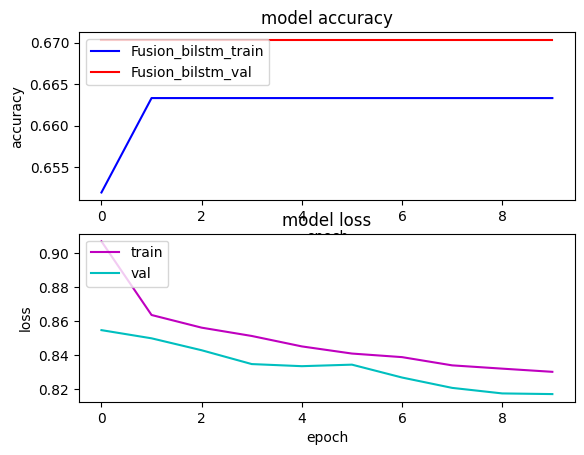

In [ ]:
# define the BiLSTM model
from keras.models import Sequential
# assume X_train, y_train, X_test, y_test are NumPy arrays containing the training and test data
input_shape = (object_class_features3.shape[1], 1)
lstm_model = Sequential()
#lstm_model.add(Bidirectional(LSTM(64,dropout=0.2,recurrent_dropout=0.2), input_shape=input_shape))
lstm_model.add(LSTM(512, input_shape=input_shape))
#lstm_model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
#lstm_model.add(Bidirectional(LSTM(64)))
lstm_model.add(Dense(3,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))
#lstm_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',
            metrics=['categorical_accuracy'])

with tf.device('/device:GPU:0'): #when GPU is used
  #Excecute Bilstm
  lstm_history=lstm_model.fit(x=X_train, y=y_train,validation_split=0.1,batch_size=128,  epochs=10)
  #com_history=fusion_modelfit(x=X_train, y_train, epochs=10,batch_size=128, validation_split=0.1,validation_data=(X_test, y_test))

  #accuracy vs loss function
  s, (at, al) = plt.subplots(2,1)
  at.plot(lstm_history.history['categorical_accuracy'], c= 'b')
  at.plot(lstm_history.history['val_categorical_accuracy'], c='r')
  at.set_title('model accuracy')
  at.set_ylabel('accuracy')
  at.set_xlabel('epoch')
  at.legend(['Fusion_bilstm_train', 'Fusion_bilstm_val'], loc='upper left')

  al.plot(lstm_history.history['loss'], c='m')
  al.plot(lstm_history.history['val_loss'], c='c')
  al.set_title('model loss')
  al.set_ylabel('loss')
  al.set_xlabel('epoch')
  al.legend(['train', 'val'], loc = 'upper left')
  cpredicted = lstm_model.predict(X_test)
  #com_score=fusion_model.evaluate(y_test)
  #print('Test Loss:', com_score[0])
  #print('Test accuracy:', com_score[1])
  cypredicted = np.argmax(cpredicted,axis=1)
  #y_predicted = np.where(predicted>0.5,1,0)
  print('Results of Bilstm model')
  from sklearn.metrics import classification_report
  print(classification_report(y_test,cypredicted,digits=4))

In [ ]:
#y_test = pd.get_dummies(y_test)
#f1ypredicted1 = pd.get_dummies(f1ypredicted)
print(f1ypredicted.shape,y_test.shape)

(1702,) (1702,)


In [ ]:
y_test

array([2, 2, 2, ..., 1, 2, 2])

In [ ]:
import scipy.stats as stats

# Predicted sentiment scores
#predicted_scores = [3.2, 4.1, 2.9, 3.7, 4.5]
# Ground truth sentiment scores
#ground_truth_scores = [3.5, 3.9, 2.8, 4.0, 4.2]

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(f1ypredicted, y_test)

# Check significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between predicted and ground truth sentiment scores.")
else:
    print("There is no significant difference between predicted and ground truth sentiment scores.")


There is a significant difference between predicted and ground truth sentiment scores.


In [ ]:
# Perform Wilcoxon signed-rank test
z_statistic, p_value = stats.wilcoxon(f1ypredicted, y_test)

# Check significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between predicted and ground truth sentiment scores.")
else:
    print("There is no significant difference between predicted and ground truth sentiment scores.")


There is a significant difference between predicted and ground truth sentiment scores.
